![](images/vaccine-6116391_1920_pixabay.jpg)

# **COVID-19 Vaccination Progress - Exploratory Data Analysis**

## INTRODUCTION

***

### COVID-19 pandemic

The coronavirus disease (COVID-19) is an infectious disease which is caused by a new coronavirus and was first detected in Q4 2019. As the disease spread around the world it was declared a pandemic early in 2020. Now, a year later (March 2021), the effects of the global pandemic continue to affect and change the lives of each and everyone across the world. Whereas most people who contract the disease will experience mild to moderate respiratory illness and recover without requiring special treatment, especially the elderly, and those with underlying medical problems are more likely to develop very serious conditions. The way forward in fighting the disease is to vaccinate the world population. In our EDA we will investigate the progress of this process from December 2020 to March 2021.
A complete overview of the COVID-19 pandemic by the [WHO](https://www.who.int/health-topics/coronavirus#tab=tab_1).

***

### Dataset overview

The dataset used in this capstone project is COVID-19 World Vaccination Progress (version 81) created by Gabriel Preda and [available on Kaggle](https://www.kaggle.com/gpreda/covid-world-vaccination-progress). It is a compilation of COVID-19 vaccination data provided by [OurWordinData](https://ourworldindata.org/covid-vaccinations). The 'OurWorldinData' website contains many information regarding the global vaccination progress, including visualisations of the progress as well as an overview of approved vaccines worldwide. 

**The dataset contains 8079 observations for 15 features.**

| FEATURE | description | comment |
|----|----|----|
| **country** | 147 countries | 4 duplicates, UN recognises 197 countries (193 are members) |
| **iso_code** | country code by ISO norm | -|
| **date** | data entry (13th December 2020 to 24th March 2021) | - |
| **vaccines** | name/company | - |
| **daily_vaccinations** | no. of vaccination for that date/country | some days only daily vaccinations, some days only the (cummulative) total |
| **daily_vaccinations_raw** | daily vaccinations as CHANGE COMPARED TO PREVIOUS DAY (cross-check purposes) | calculation: total_vaccinations (day) - total_vaccination (previous day) |
| **daily_vaccinations_per_million** | ratio (in ppm) between vaccination number and total population for the current date in the country | - |
| **total_vaccinations** | absolute number of immunisations (jabs) in the country | some days only daily vaccinations, some days only the (cummulative) total |
| **total_vaccinations_per_hundred** | ratio (in percent) between vaccination number and total population up to the date in the country | - |
| **people_vaccinated** | total no. of people with immunisation (partial and full) | - |
| **people_vaccinated_per_hundred** | ratio (in percent) between population immunized (partial and full) and total population | - |
| **people_fully_vaccinated** | total no. of people with full immunisation (typically 2) | - |
| **people_fully_vaccinated_per_hundred** | ratio (in percent) between population fully immunized and total population | - |
| **source_name** | national authority, international organization, local organization etc. | - |
| **source_website** | website link to source | - |

***

### Key objectives

- Which country is the fastest with vaccinating its people?
- Which country vaccinated the most (absolute)?
- How looks the vaccination progress by region?

***

In [61]:
#common imports:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import os

import matplotlib.dates as md

#import for visualization
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas_bokeh
pandas_bokeh.output_notebook()
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
#for Worldmap
#import shapefile as shp


#for timeseries:
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter


#from wordcloud import WordCloud
from pandas_profiling import ProfileReport

sns.set(rc={'figure.figsize':(10,8)})


#suppress pandas future warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

    

Loading BokehJS ...

In [62]:
#output_notebook()

In [63]:
#Loading cleaned dataframe from Data_Cleaning Notebook:
df2 = pd.read_csv('df2.csv')
df3 = pd.read_csv('df3.csv')
df4 = pd.read_csv('df4.csv')
df5 = pd.read_csv('df5.csv')
#df6 = pd.read_csv('df6.csv')

In [64]:
#Number of countries included in dataset:
df6 = df5.copy()
#df6 = df6.set_index(['date'])
ncountry = df6['country'].nunique()
print(F'{ncountry} countries are included in the Covid-19 vaccination progress dataset.')

144 countries are included in the Covid-19 vaccination progress dataset.


In [65]:
#Create list with countries per region, create new column in df6 and map region to country:
Africa = ('Algeria','Angola','Chad', "Cote d'Ivoire",'Egypt','Equatorial Guinea','Ghana','Guinea','Kenya','Malawi','Maldives','Mali','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe', 'Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara', 'Zambia','Zimbabwe')

Asia = ('Afghanistan','Azerbaijan','Bangladesh','Bhutan','Brunei','Cambodia','China','East Timor','Hong Kong','India','Indonesia','Japan','Kazakhstan','Kyrgyzstan','Laos','Macao','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Pakistan','Philippines','Russia','Singapore','South Korea','Sri Lanka','Taiwan','Tajikistan','Thailand','Turkmenistan','Uzbekistan','Vietnam')
    
Middle_East = ('Bahrain','Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman','Qatar','Saudi Arabia','Syria','Turkey','United Arab Emirates','Yemen')
   
Europe = ('Albania','Andorra','Armenia','Austria','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Faeroe Islands','Finland','France','Georgia','Germany','Greece','Greenland','Hungary','Iceland','Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Northern Cyprus','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','Vatican City')

UK_BritishOversea= ('United Kingdom','Anguilla','Antigua and Barbuda','Bermuda','Cayman Islands','Falkland Islands','Gibraltar','Guernsey','Isle of Man','Jersey', 'Montserrat', 'Saint Helena', 'Turks and Caicos Islands')

North_America = ('Canada','United States')
Central_America_Caribic = ('Antigua and Barbuda','Bahamas','Barbados','Belize','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago')
South_America = ('Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela')
Australia_Oceania = ('Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu')


continents = {country: 'Asia' for country in Asia}
continents.update({country: 'Europe' for country in Europe})
continents.update({country: 'Africa' for country in Africa})
continents.update({country: 'Middle_East' for country in Middle_East})
continents.update({country: 'UK_BritishOversea' for country in UK_BritishOversea})
continents.update({country: 'North_America' for country in North_America})
continents.update({country: 'Central_America_Caribic' for country in Central_America_Caribic})
continents.update({country: 'South_America' for country in South_America})
continents.update({country: 'Australia_Oceania' for country in Australia_Oceania})

df6['cgrouped'] = df6['country'].map(continents)



## Groupby Countries & Regions

### Which country is the fastest with fully vaccinating its people?

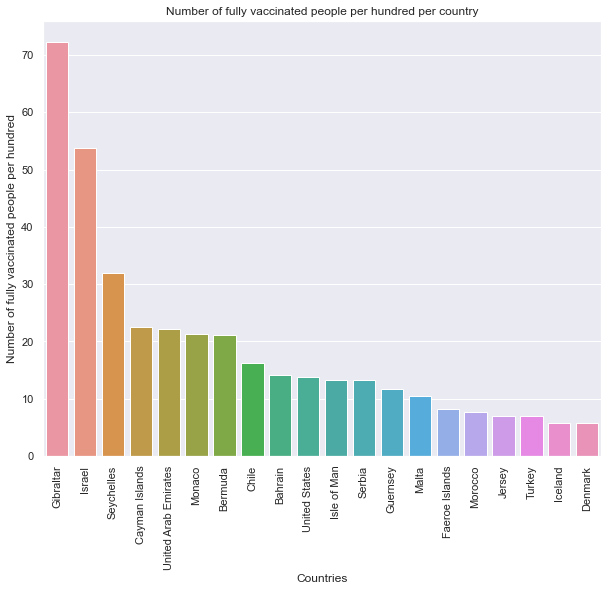

In [24]:
col_vacc = ['country', 'vaccines','people_fully_vaccinated_per_hundred']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('people_fully_vaccinated_per_hundred', ascending=False).dropna(subset=['people_fully_vaccinated_per_hundred'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:20]

vacc_am_bycountry = vacc_am_bycountry.sort_values('people_fully_vaccinated_per_hundred', ascending=False)

#plt.figure(figsize=(8, 8))
vacc_p_c = sns.barplot(vacc_am_bycountry.index, vacc_am_bycountry.people_fully_vaccinated_per_hundred)

plt.title('Number of fully vaccinated people per hundred per country')
plt.ylabel('Number of fully vaccinated people per hundred')
plt.xlabel('Countries')
plt.xticks(rotation=90)
#fig.savefig('images/vacc_people_hundred_country.jpg')
plt.show();


Until 24.03.2021 Gibraltar is clearly leading in vaccinating its citizens. Followed by Israel and Seychelles. Gibraltar is part of British Overseas Territory and the UK vaccination program also includes procurement of vaccines for British Overseas Territories and Crown Dependencies. 

Let's have a look at the population and GDP per country:

Gibraltar: 33691 citizens (UK: 502 billion USD in 2020, citizen: 67 millions plus 272 000 citizens British Oversea)

Israel: 8.7 million citizens and a GDP of 334 billions USD  in 2020

Seychelles: 98000 citizens and a GDP of 1.4 billion USD in 2020.

It is obvious that smaller countries are leading and when we have a look at the next plots, we see how much more effort larger countries have to do.


### Which country vaccinated the most (absolute)?

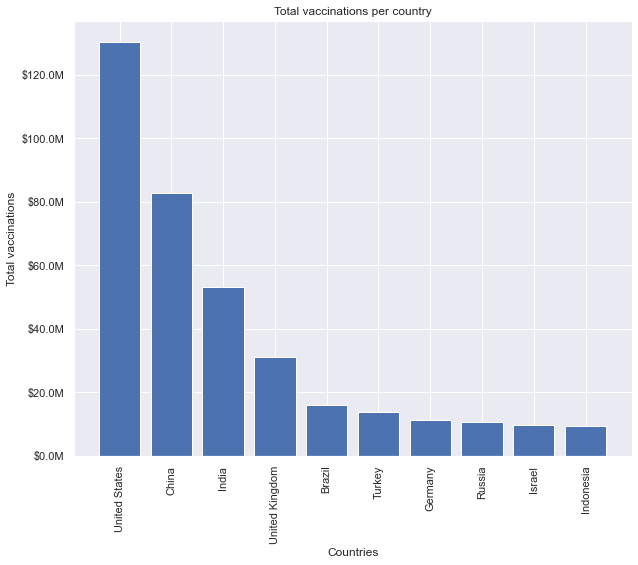

In [25]:
col_vacc = ['country', 'total_vaccinations', 'vaccines']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

fig, ax = plt.subplots()

plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.total_vaccinations, color = 'b')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

plt.title('Total vaccinations per country')

ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation = 90)
plt.ylabel('Total vaccinations')
plt.xlabel('Countries')
plt.show();

This chart shows the enourmous effort larger countries have to do in vaccinating their citizens. United States already vaccinated over 130 million doses and have only 25% of their cititzens vaccinated but Israel with only 9 million citizens has already vaccinated 60% of its population.

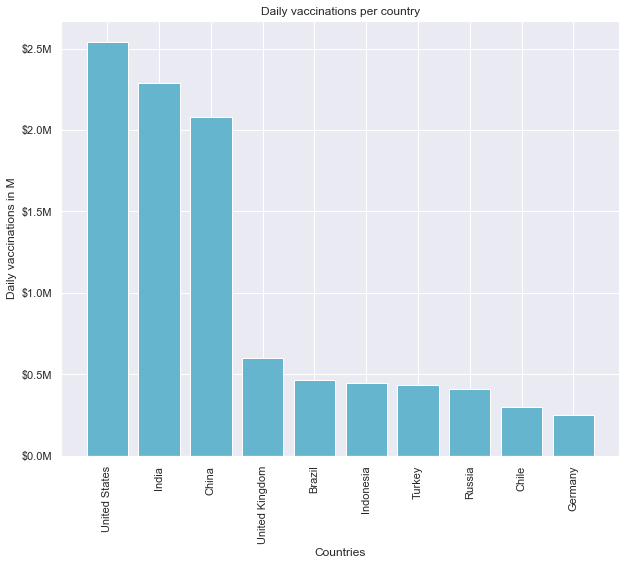

In [26]:
#Groupby daily vaccinations

col_vacc = ['country', 'daily_vaccinations', 'vaccines']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('daily_vaccinations', ascending=False).dropna(subset=['daily_vaccinations'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

fig, ax = plt.subplots()
#plt.figure(figsize=(16, 7))
plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.daily_vaccinations, color = 'c')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)



ax.yaxis.set_major_formatter(formatter)

plt.title('Daily vaccinations per country')
plt.xticks(rotation = 90)
plt.ylabel('Daily vaccinations in M')
plt.xlabel('Countries')
plt.show();

United Stated vaccinates over 2.5 M people daily, Germany is only around 250.000 but still in the Top 10.

### How looks the vaccination progress by region?

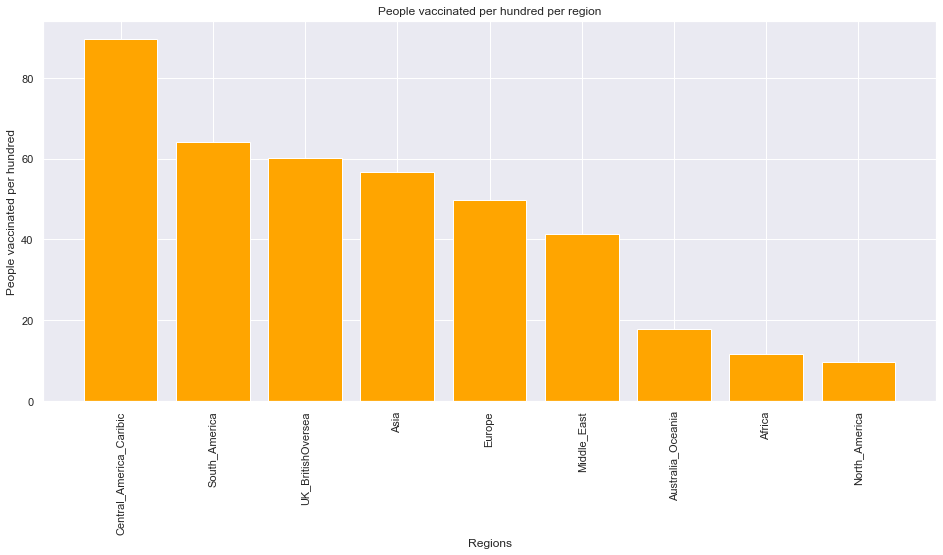

In [27]:
#Groupby regions:
col_vacc = ['cgrouped', 'people_vaccinated_per_hundred']
vacc_am_bycountry = df6[col_vacc].groupby('cgrouped').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

plt.figure(figsize=(16, 7))
plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.people_vaccinated_per_hundred, color = 'orange')

plt.title('People vaccinated per hundred per region')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Regions')
plt.show();

Central America and Caribic is surprising in leading in number of vaccinated people per hundred. So let's have a closer look which countries are leading here:

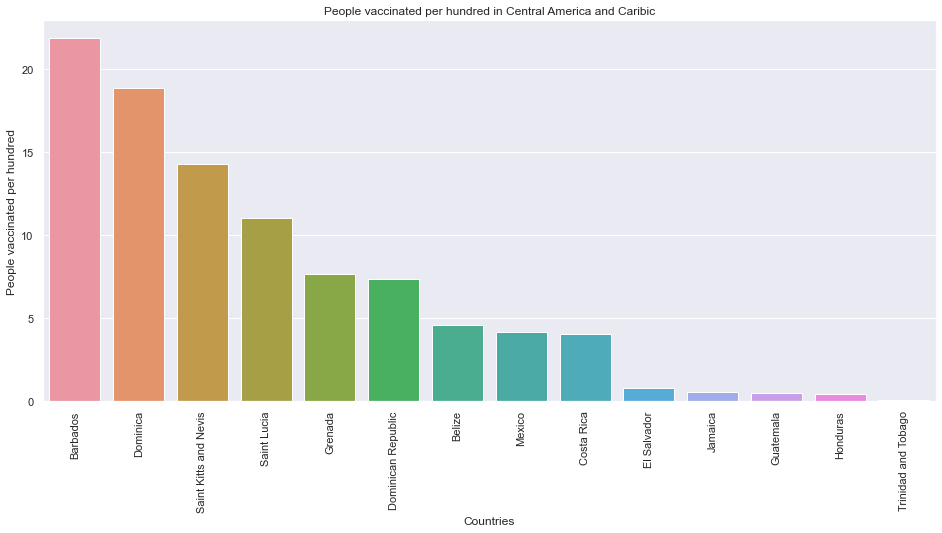

In [116]:
Central_America_Caribic = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago']

country_cenAm = df2[df2.country.isin(Central_America_Caribic)]
col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']

country_cenAm1 = country_cenAm[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
country_cenAm1 = country_cenAm1.iloc[:20] 
country_cenAm1= country_cenAm1.sort_values('people_vaccinated_per_hundred', ascending=False)
#vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
#vacc_am_bycountry = vacc_am_bycountry.iloc[:20]

#vacc_am_bycountry = vacc_am_bycountry.sort_values('people_vaccinated_per_hundred', ascending=False)

plt.figure(figsize=(16, 7))
#plt.bar(country_cenAm.index, country_cenAm.people_vaccinated_per_hundred, color = 'orange')
sns.barplot(country_cenAm1.index, country_cenAm1.people_vaccinated_per_hundred)
plt.title('People vaccinated per hundred in Central America and Caribic')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Countries')
plt.show();




With having a detailled look at the countries we see that again a small country brings the statistic up. Barbados has a population of 287 000 citizens and is middle income country with a GDP of 5.2 billions USD in 2019. More surprising is Dominica as it is one of the poorest of the Caribbean countries. 

Country plot for South America:

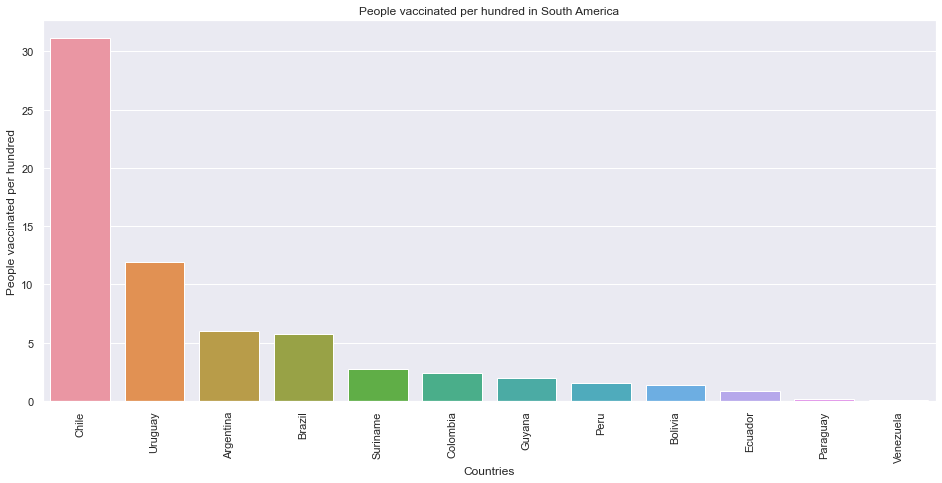

In [119]:
South_America = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela']
country_SouthAm = df2[df2.country.isin(South_America)]
col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']

country_SouthAm1 = country_SouthAm[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
country_SouthAm1 = country_SouthAm1.iloc[:20] 
country_SouthAm1 = country_SouthAm1.sort_values('people_vaccinated_per_hundred', ascending=False)
#vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
#vacc_am_bycountry = vacc_am_bycountry.iloc[:20]

#vacc_am_bycountry = vacc_am_bycountry.sort_values('people_vaccinated_per_hundred', ascending=False)

plt.figure(figsize=(16, 7))
#plt.bar(country_cenAm.index, country_cenAm.people_vaccinated_per_hundred, color = 'orange')
sns.barplot(country_SouthAm1.index, country_SouthAm1.people_vaccinated_per_hundred)
plt.title('People vaccinated per hundred in South America')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Countries')
plt.show();




For South America Chile is the only country with an significant vaccination progress. 

Country plot Asia

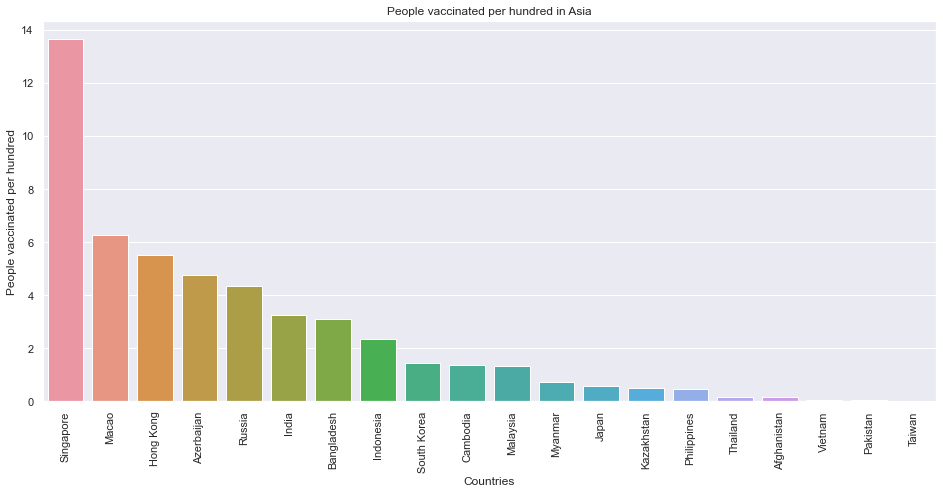

In [128]:
Asia = ['Afghanistan','Azerbaijan','Bangladesh','Bhutan','Brunei','Cambodia','China','East Timor','Hong Kong','India','Indonesia','Japan','Kazakhstan','Kyrgyzstan','Laos','Macao','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Pakistan','Philippines','Russia','Singapore','South Korea','Sri Lanka','Taiwan','Tajikistan','Thailand','Turkmenistan','Uzbekistan','Vietnam']
    
country_Asia = df2[df2.country.isin(Asia)]
col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']

country_Asia1 = country_Asia[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
country_Asia1 = country_Asia1.iloc[:20] 
country_Asia1 = country_Asia1.sort_values('people_vaccinated_per_hundred', ascending=False)


plt.figure(figsize=(16, 7))
#plt.bar(country_cenAm.index, country_cenAm.people_vaccinated_per_hundred, color = 'orange')
sns.barplot(country_Asia1.index, country_Asia1.people_vaccinated_per_hundred)
plt.title('People vaccinated per hundred in Asia')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Countries')
plt.show();



Singapore is a rich city-state with a population of 5.6 millions and a gdp of 372 billions USD in 2019. In comparison with other states it shows a slow vaccination progress with not even 14% people vaccinated per hundred (partial or fully) and also South Korea and Japan are far away from a successful vaccination start.

Country plot Africa

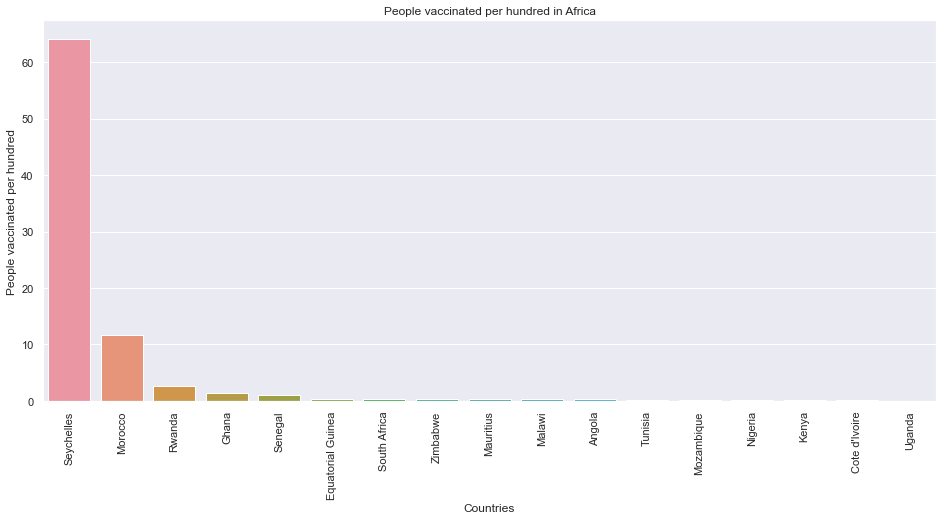

In [121]:
Africa = ['Algeria','Angola','Chad', "Cote d'Ivoire",'Egypt','Equatorial Guinea','Ghana','Guinea','Kenya','Malawi','Maldives','Mali','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe', 'Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara', 'Zambia','Zimbabwe']

country_Africa = df2[df2.country.isin(Africa)]
col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']

country_Africa1 = country_Africa[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
country_Africa1 = country_Africa1.iloc[:20] 
country_Africa1 = country_Africa1.sort_values('people_vaccinated_per_hundred', ascending=False)


plt.figure(figsize=(16, 7))
#plt.bar(country_cenAm.index, country_cenAm.people_vaccinated_per_hundred, color = 'orange')
sns.barplot(country_Africa1.index, country_Africa1.people_vaccinated_per_hundred)
plt.title('People vaccinated per hundred in Africa')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Countries')
plt.show();
   

The vaccinations process for Africa does not really exist until mid of march. 

Country plot Middle_East

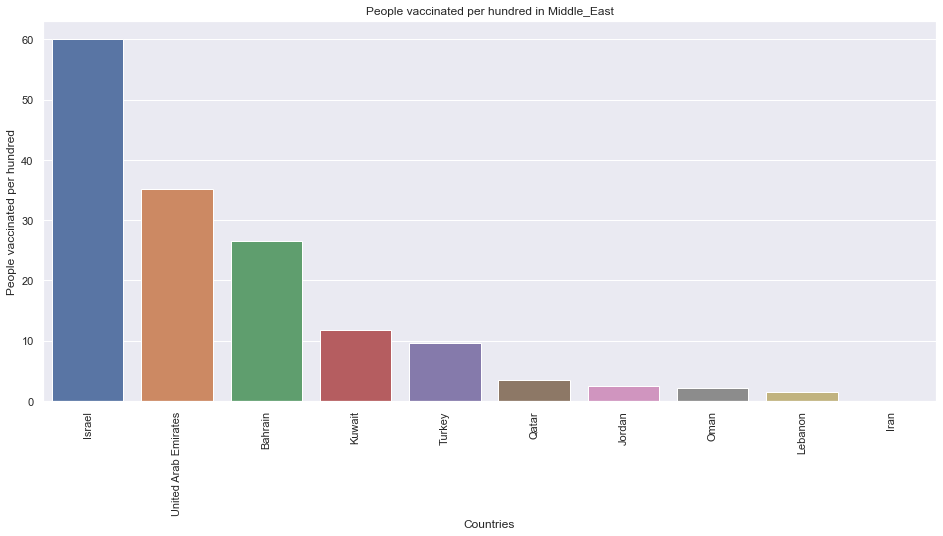

In [129]:
Middle_East = ['Bahrain','Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman','Qatar','Saudi Arabia','Syria','Turkey','United Arab Emirates','Yemen']

country_Middle_East = df2[df2.country.isin(Middle_East)]
col_vacc = ['country', 'vaccines','people_vaccinated_per_hundred']

country_Middle_East1 = country_Middle_East[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
country_Middle_East1 = country_Middle_East1.iloc[:20] 
country_Middle_East1 = country_Middle_East1.sort_values('people_vaccinated_per_hundred', ascending=False)


plt.figure(figsize=(16, 7))
#plt.bar(country_cenAm.index, country_cenAm.people_vaccinated_per_hundred, color = 'orange')
sns.barplot(country_Middle_East1.index, country_Middle_East1.people_vaccinated_per_hundred)
plt.title('People vaccinated per hundred in Middle_East')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Countries')
plt.show();

The successful vaccination progress for Israel we have seen before. Second in the list are the United Arab Emirates(UAE) which is the wealthiest country in the Middle East, followed by Bahrain and Kuwait. 

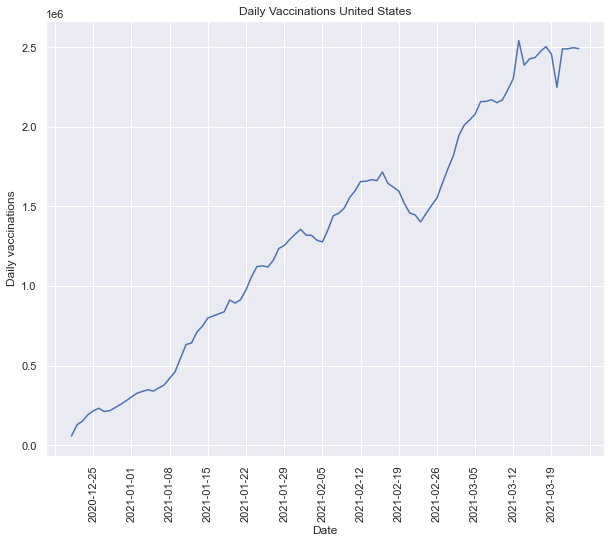

In [28]:
import matplotlib.dates as mdates
df2_us = df2[df2.country == 'United States']
graph = sns.lineplot(data=df2_us, x="date", y="daily_vaccinations")
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)
plt.title('Daily Vaccinations United States')
plt.xlabel('Date')
plt.ylabel('Daily vaccinations')
plt.show()

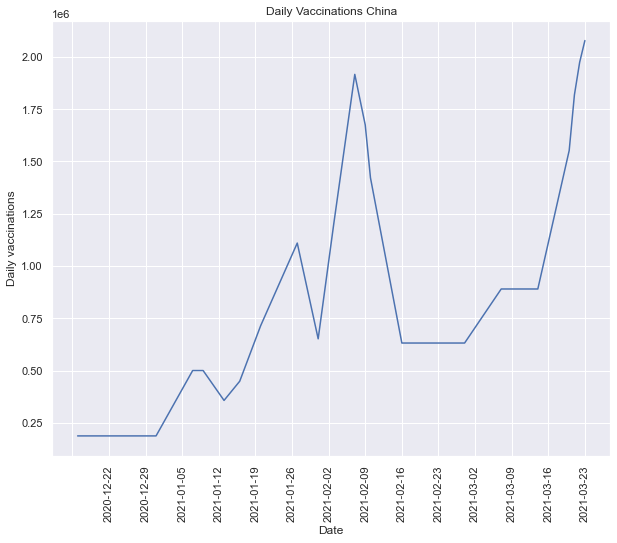

In [29]:
df2_cn = df2[df2.country == 'China']
graph = sns.lineplot(data=df2_cn, x="date", y="daily_vaccinations")
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)
plt.title('Daily Vaccinations China')
plt.xlabel('Date')
plt.ylabel('Daily vaccinations')
plt.show()

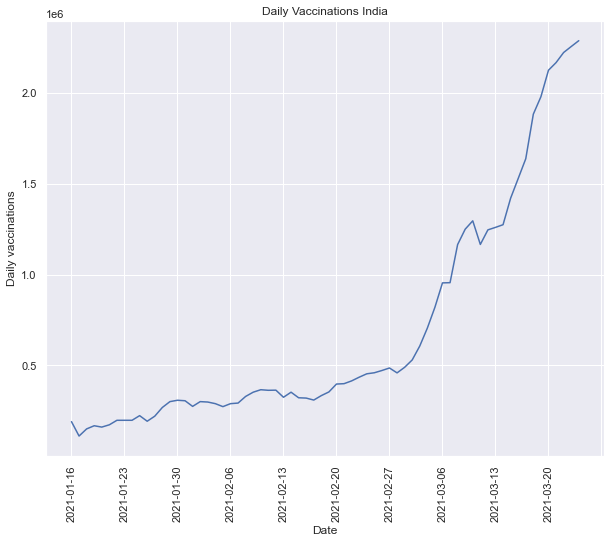

In [30]:
df2_india = df2[df2.country == 'India']
graph = sns.lineplot(data=df2_india, x="date", y="daily_vaccinations")
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)
plt.title('Daily Vaccinations India')
plt.xlabel('Date')
plt.ylabel('Daily vaccinations')
plt.show()

### Worldmap

In [31]:
#Initialize visualization set:
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(10,6))

In [32]:
import geopandas as gpd
#from shapely.geometry import Point
import geopy
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

In [33]:
#import geo data
import geopandas as gpd
## map plot based on country map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#fix missing iso codes for France, Norway, Somaliland and Kosovo:
world.loc[world['name'] == 'France', 'iso_a3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso_a3'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'iso_a3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso_a3'] = 'RKS'
world.sample(15)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
164,6653210,Africa,Libya,LBY,90890.0,"POLYGON ((25.00000 22.00000, 25.00000 20.00304..."
75,11466756,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762..."
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
58,7965055,Africa,Togo,TGO,11610.0,"POLYGON ((0.89956 10.99734, 0.77234 10.47081, ..."
131,10839514,Europe,Portugal,PRT,297100.0,"POLYGON ((-9.03482 41.88057, -8.67195 42.13469..."
106,5351277,Asia,Turkmenistan,TKM,94720.0,"POLYGON ((52.50246 41.78332, 52.94429 42.11603..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
66,5625118,Africa,Central African Rep.,CAF,3206.0,"POLYGON ((27.37423 5.23394, 27.04407 5.12785, ..."
138,22409381,Asia,Sri Lanka,LKA,236700.0,"POLYGON ((81.78796 7.52306, 81.63732 6.48178, ..."


In [34]:
#join new map data to existing CV19 vaccine dataframe
mapped = world.set_index('iso_a3').join(df2.set_index('iso_code')).reset_index()

In [35]:
#function to create map graph
def graph_world(feature):
    to_be_mapped = feature
    vmin, vmax = 0,100
    fig, ax = plt.subplots(1, figsize=(25,25))

    mapped.plot(column=to_be_mapped, cmap='Blues', linewidth=0.8, ax=ax, edgecolors='0.8')
    ax.set_title('x', fontdict={'fontsize':30})
    ax.set_axis_off()

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    cbar = fig.colorbar(sm, orientation='horizontal')

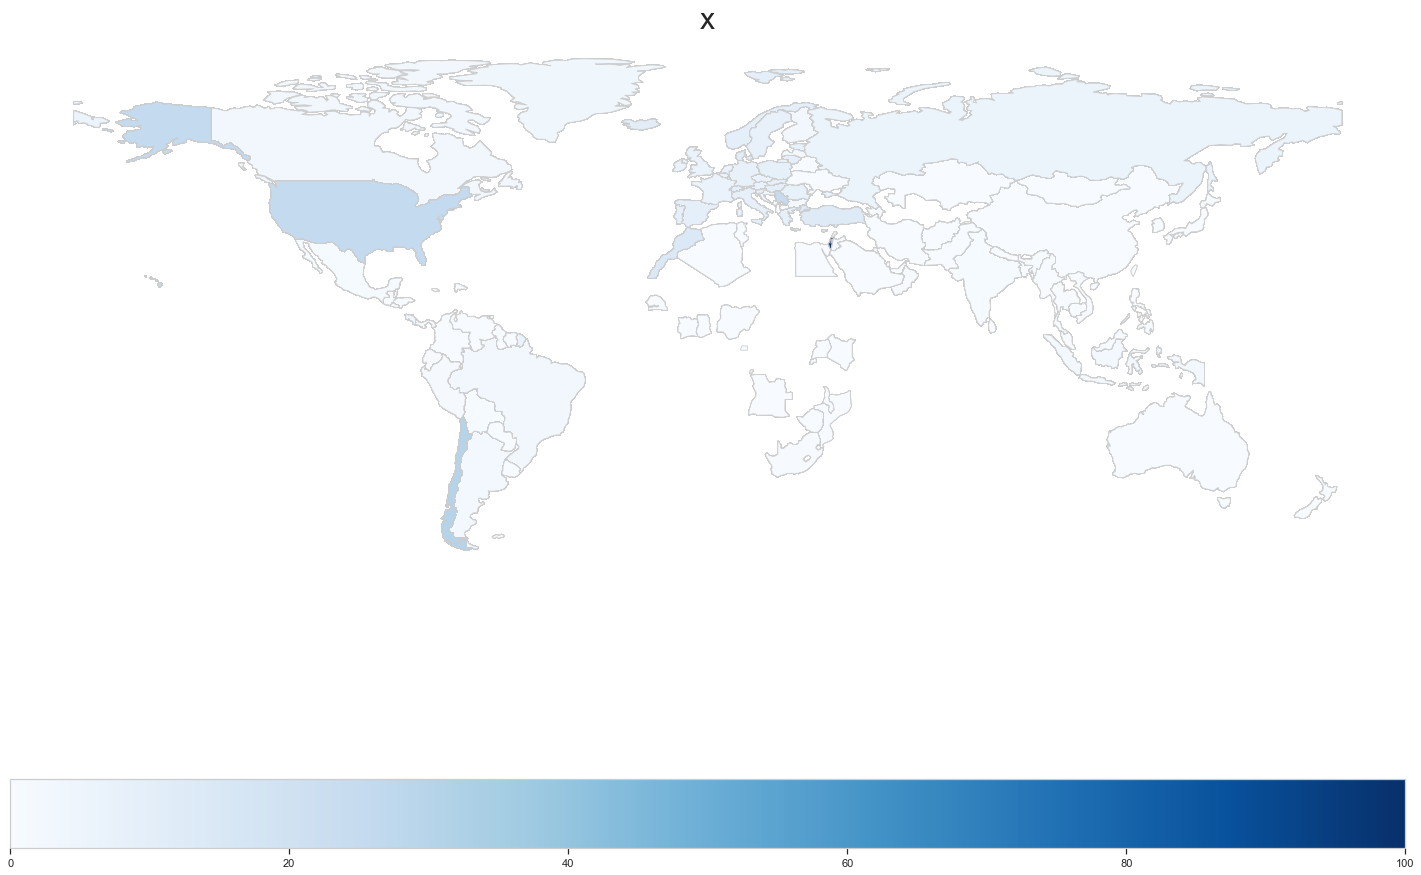

In [36]:
# Compare visually vaccination rates across world
graph_world('people_fully_vaccinated_per_hundred')

The world maps gives an overview of the progress in fully vaccinating people in relation to the population. We can see how different the progress by continent is. The empty 

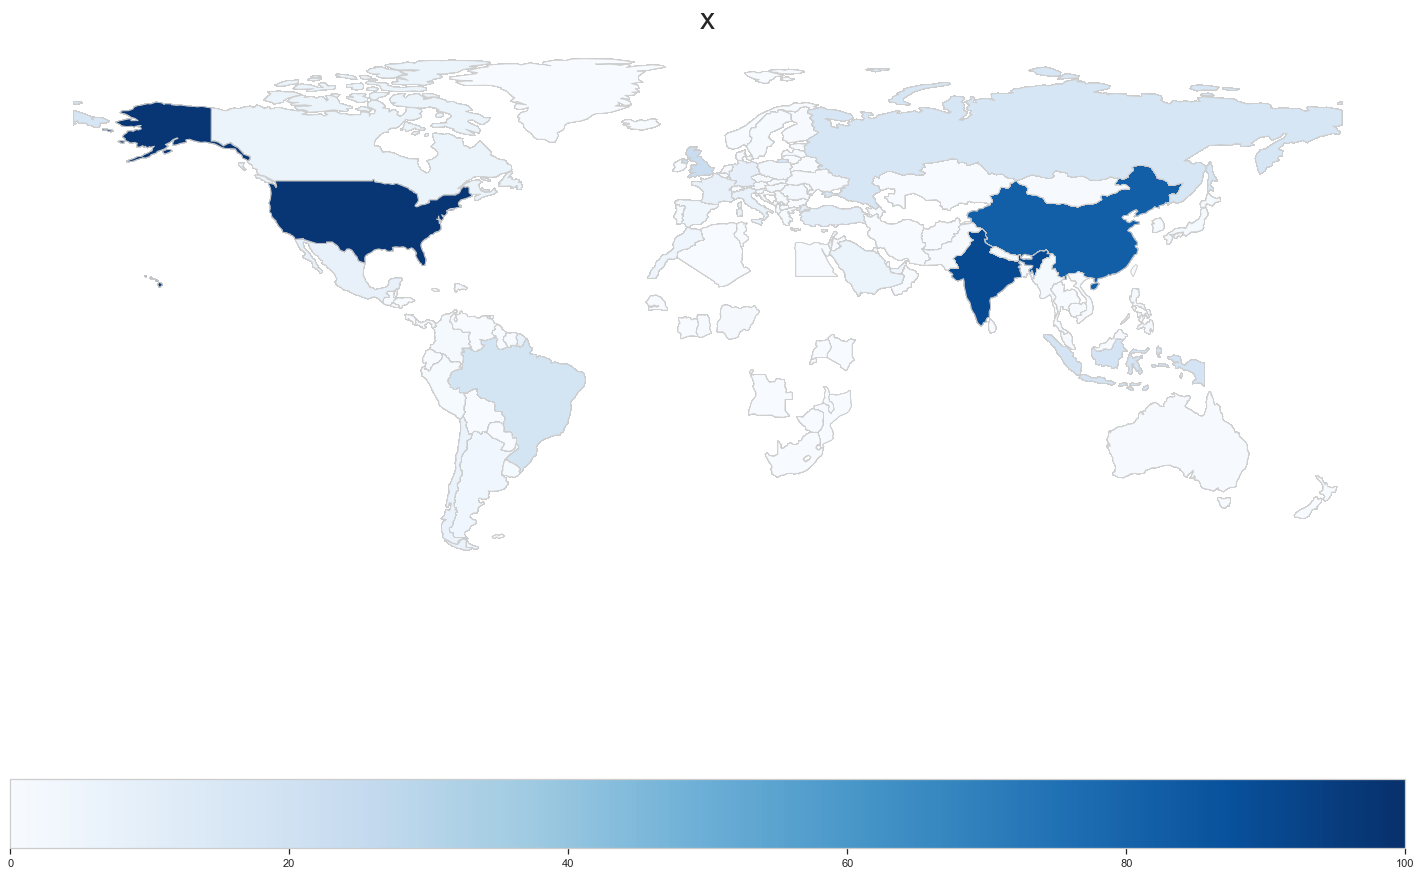

In [37]:
#daily vaccinations
graph_world('daily_vaccinations')

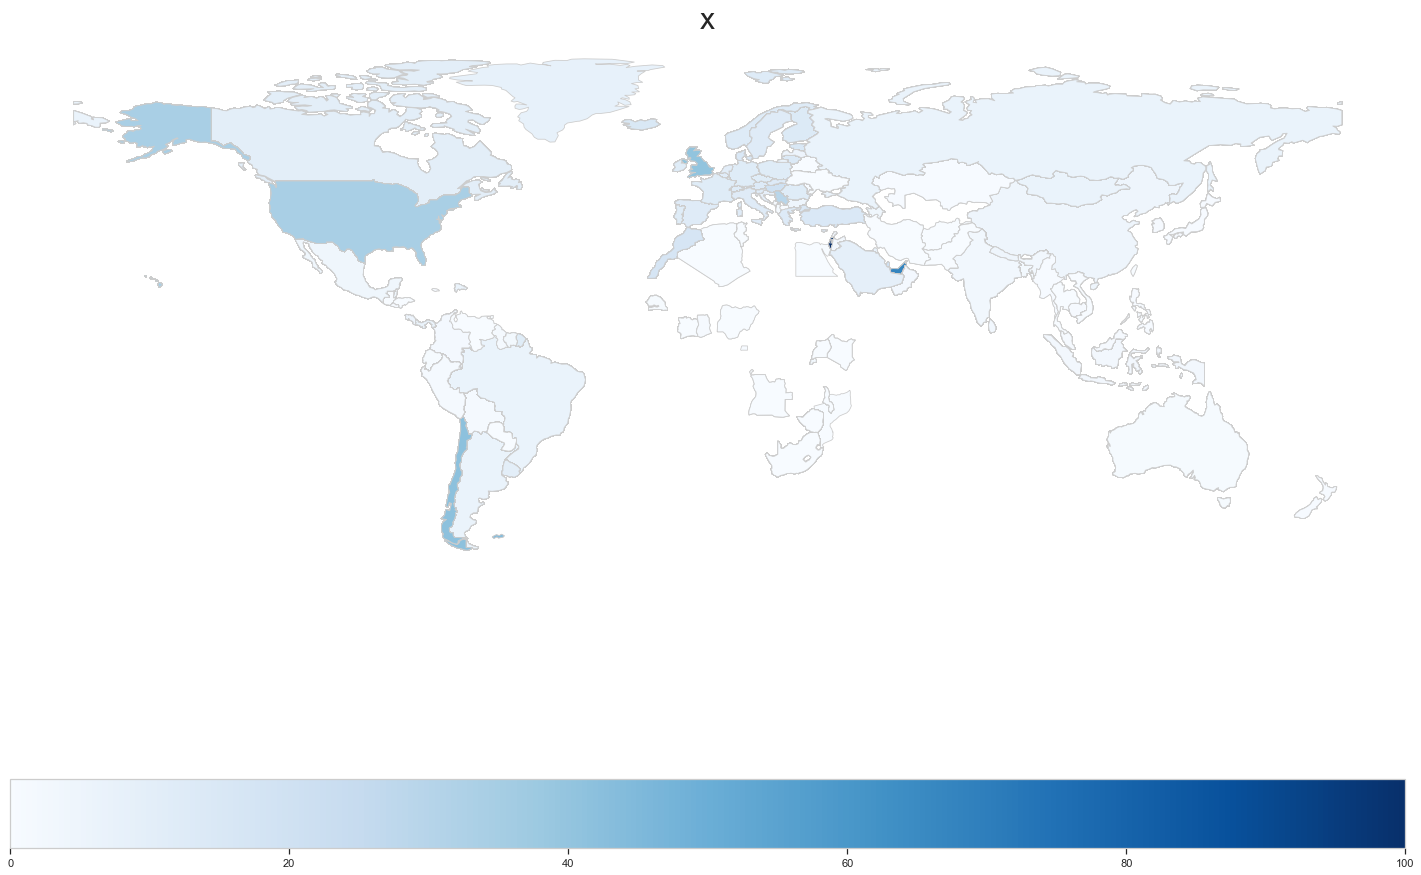

In [38]:
#total vaccinations per hundr
graph_world('total_vaccinations_per_hundred')

In [39]:
mapped.head()

,index,pop_est,continent,name,gdp_md_est,geometry,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,-99,265100,Asia,N. Cyprus,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,34124811,Asia,Afghanistan,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,2021-02-23,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca
2,AFG,34124811,Asia,Afghanistan,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,2021-02-24,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca
3,AFG,34124811,Asia,Afghanistan,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,2021-02-25,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca
4,AFG,34124811,Asia,Afghanistan,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,2021-02-26,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca


In [40]:
df2.tail(20)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
7477,Zimbabwe,ZWE,2021-03-05,31325.0,31325.0,0.0,2678.0,0.21,0.21,0.0,180.0,Sinopharm/Beijing
7478,Zimbabwe,ZWE,2021-03-06,32014.0,32014.0,0.0,2330.0,0.22,0.22,0.0,157.0,Sinopharm/Beijing
7479,Zimbabwe,ZWE,2021-03-07,32240.0,32240.0,0.0,1914.0,0.22,0.22,0.0,129.0,Sinopharm/Beijing
7480,Zimbabwe,ZWE,2021-03-08,35518.0,35518.0,0.0,2009.0,0.24,0.24,0.0,135.0,Sinopharm/Beijing
7481,Zimbabwe,ZWE,2021-03-09,35761.0,35761.0,0.0,1526.0,0.24,0.24,0.0,103.0,Sinopharm/Beijing
7482,Zimbabwe,ZWE,2021-03-10,35901.0,35901.0,0.0,1133.0,0.24,0.24,0.0,76.0,Sinopharm/Beijing
7483,Zimbabwe,ZWE,2021-03-11,36019.0,36019.0,0.0,766.0,0.24,0.24,0.0,52.0,Sinopharm/Beijing
7484,Zimbabwe,ZWE,2021-03-12,36283.0,36283.0,0.0,708.0,0.24,0.24,0.0,48.0,Sinopharm/Beijing
7485,Zimbabwe,ZWE,2021-03-13,36359.0,36359.0,0.0,621.0,0.24,0.24,0.0,42.0,Sinopharm/Beijing
7486,Zimbabwe,ZWE,2021-03-14,36359.0,36359.0,0.0,588.0,0.24,0.24,0.0,40.0,Sinopharm/Beijing


In [41]:
#select last date:
df_last = df2.sort_values('date', ascending=False).groupby('country').tail(1)
df_last.sample(15)
df_last.shape

(144, 12)

In [42]:
df_last

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
6913,Taiwan,TWN,2021-03-22,1578.0,1578.0,0.0,1578.0,0.01,0.01,0.00,66.0,Oxford/AstraZeneca
6030,Saint Vincent and the Grenadines,VCT,2021-03-18,NaN,NaN,0.0,216.0,NaN,NaN,0.00,1947.0,Oxford/AstraZeneca
4364,Malawi,MWI,2021-03-18,9091.0,9091.0,0.0,3674.0,0.05,0.05,0.00,192.0,Oxford/AstraZeneca
2218,Equatorial Guinea,GNQ,2021-03-16,6565.0,5765.0,800.0,NaN,0.47,0.41,0.06,NaN,Sinopharm/Beijing
6952,Tunisia,TUN,2021-03-13,743.0,743.0,0.0,743.0,0.01,0.01,0.00,63.0,"Pfizer/BioNTech, Sputnik V"
...,...,...,...,...,...,...,...,...,...,...,...,...
3514,Israel,ISR,2020-12-20,7401.0,7401.0,0.0,7340.0,0.09,0.09,0.00,848.0,"Moderna, Pfizer/BioNTech"
5800,Russia,RUS,2020-12-16,NaN,NaN,0.0,3357.0,NaN,NaN,0.00,23.0,"EpiVacCorona, Sputnik V"
1486,China,CHN,2020-12-16,NaN,NaN,0.0,187500.0,NaN,NaN,0.00,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
1209,Canada,CAN,2020-12-15,723.0,NaN,0.0,718.0,0.00,NaN,0.00,19.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"


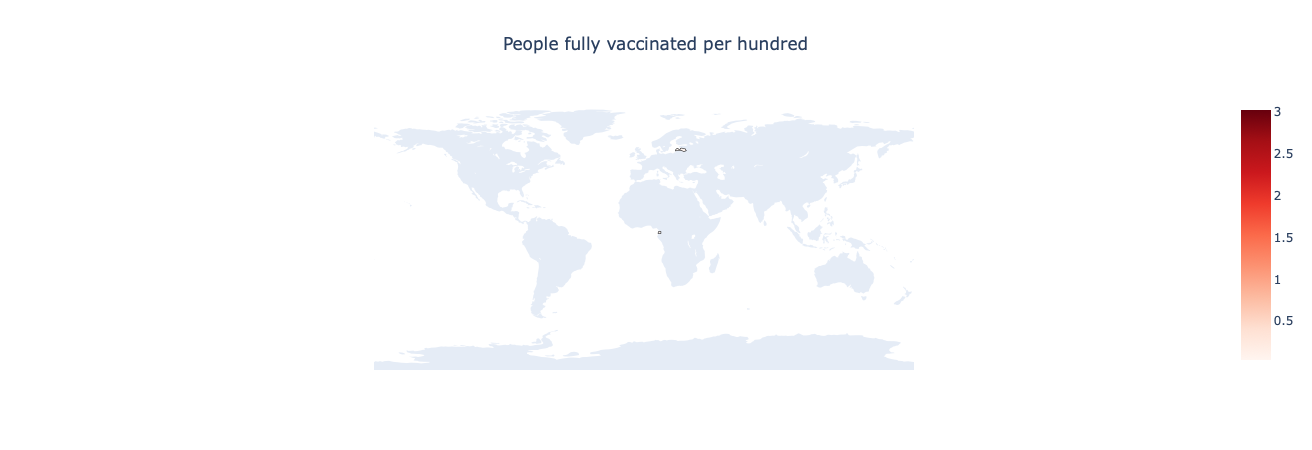

In [43]:
# Import libraries
import numpy as np 
import pandas as pd 
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Read Data
#df = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
# Rename columns
#df = df.rename(columns={'Country/Region':'Country'})
#df = df.rename(columns={'ObservationDate':'Date'})
# Manipulate Dataframe
#df_last = df.groupby(['Country', 'Date']).sum().reset_index().sort_values('Date', ascending=False)
#df_last = df_last.drop_duplicates(subset = ['country'])
df_last = df_last[df_last['people_fully_vaccinated_per_hundred']>0]
# Create the Choropleth
fig = go.Figure(data=go.Choropleth(
    locations = df_last['country'],
    locationmode = 'country names',
    z = df_last['people_fully_vaccinated_per_hundred'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'People fully vaccinated per hundred',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular',
    )
)
#noch nicht ganz richtig!

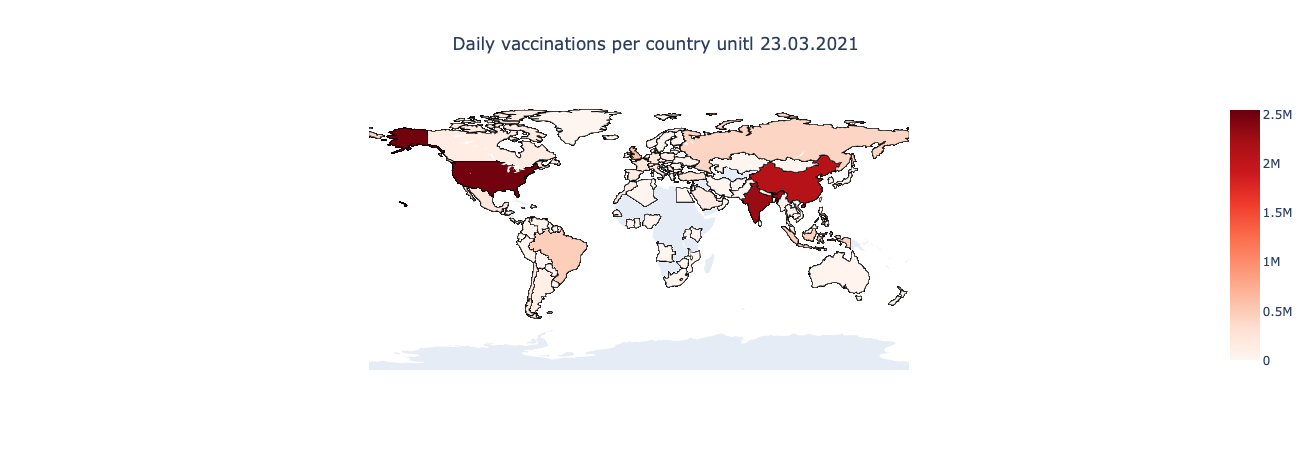

In [44]:

# Read Data
#df = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
# Rename columns
#df = df.rename(columns={'Country/Region':'Country'})
#df = df.rename(columns={'ObservationDate':'Date'})
# Manipulate Dataframe
df_daily_sum = df2.groupby(['country', 'date']).sum().reset_index().sort_values('date', ascending=False)
#df_last = df_last.drop_duplicates(subset = ['country'])
df_daily_sum = df2[df2['daily_vaccinations']>0]
# Create the Choropleth
fig = go.Figure(data=go.Choropleth(
    locations = df_daily_sum['country'],
    locationmode = 'country names',
    z = df_daily_sum['daily_vaccinations'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Daily vaccinations per country unitl 23.03.2021',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)
#noch nicht ganz richtig! Es sind noch nicht die aufsummierten anzahlen...

In [45]:
df6.head()

,country,date,"Covaxin, Oxford/AstraZeneca","EpiVacCorona, Sputnik V",Johnson&Johnson,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Moderna,"Moderna, Oxford/AstraZeneca","Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",...,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped
0,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia
2,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia
3,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia
4,Afghanistan,2021-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia


In [46]:
df6_region = df6[(df6.cgrouped == 'Europe') | (df6.cgrouped == 'North_America')]

In [47]:
df6_region.head()

,country,date,"Covaxin, Oxford/AstraZeneca","EpiVacCorona, Sputnik V",Johnson&Johnson,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Moderna,"Moderna, Oxford/AstraZeneca","Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",...,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped
22,Albania,2021-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFG,54000.0,54000.0,0.0,2862.0,0.14,0.14,0.0,74.0,Europe
23,Albania,2021-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
24,Albania,2021-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ALB,NaN,NaN,0.0,64.0,NaN,NaN,0.0,22.0,Europe
25,Albania,2021-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ALB,128.0,128.0,0.0,64.0,0.00,0.00,0.0,22.0,Europe
26,Albania,2021-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ALB,188.0,188.0,0.0,63.0,0.01,0.01,0.0,22.0,Europe


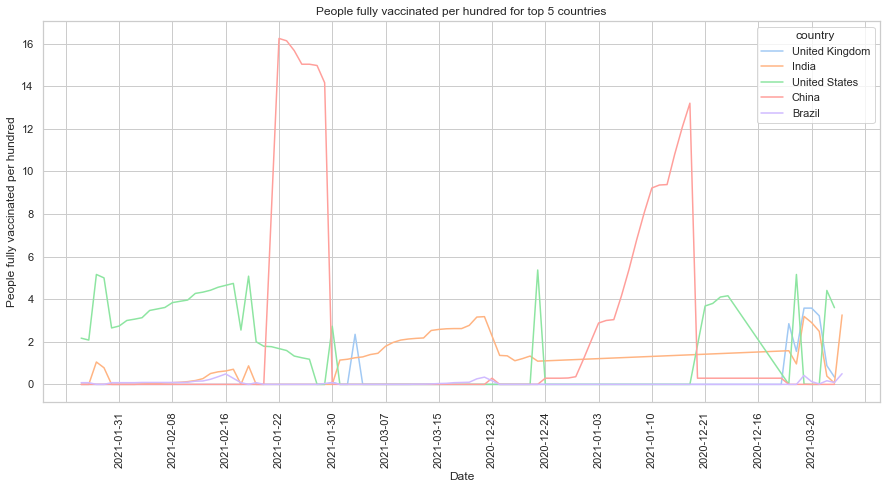

In [48]:
#Region plot as lineplot:

#Selecting required columns:
cols = ['country', 'date', 'people_fully_vaccinated_per_hundred']
df6_line = df6.reset_index()
#List of top 5 countries from above:
top10_countries = ['United States', 'India', 'China', 'United Kingdom', 'Brazil']#'Indonesia', 'Turkey', 'Russia', 'Chile', 'Germany'

# Filtering and sorting the data

df6_line1 = df6_line[['country', 'date', 'people_fully_vaccinated_per_hundred']].sort_values(by='people_fully_vaccinated_per_hundred', ascending=True)

df6_line1_top10 = df6_line1[df6_line1.country.isin(top10_countries)].dropna()

df6_line['date'] = pd.to_datetime(df6_line['date'])#, format = '%Y-%m-%d'

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(ax = ax, data=df6_line1_top10, x="date", y="people_fully_vaccinated_per_hundred",hue='country').set_title('People fully vaccinated per hundred for top 5 countries')


# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))

# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# specify the position of the minor ticks at each day
#ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
#ax.tick_params(axis = 'x', which = 'major', length = 10)
#ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Date')
plt.ylabel('People fully vaccinated per hundred')

#plt.xticks(rotation = 90)

# show the plot
plt.show();

For China we see an impressive vaccination start in January but nearly stopping end of January. India started end of January and increases slowly but steadily. 
United States has an break short before change of president and then an clear increase until end of february. Klären, was dann los war?
Was passiert für UK? Seasonality?Warum so ein up and down?

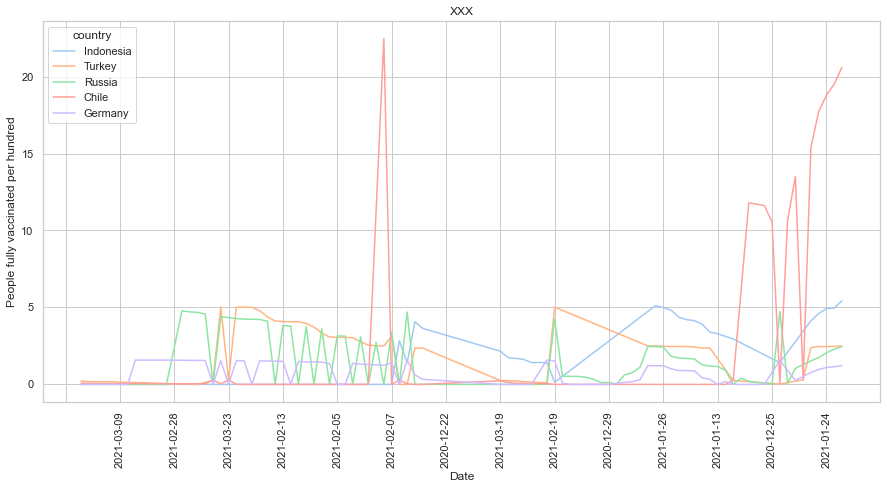

In [49]:
#Region plot as lineplot:

#Selecting required columns:
cols = ['country', 'date', 'people_fully_vaccinated_per_hundred']
df6_line = df6.reset_index()
#List of top 6-10 countries from above:
top10_countries = ['Indonesia', 'Turkey', 'Russia', 'Chile', 'Germany']

# Filtering and sorting the data

df6_line1 = df6_line[['country', 'date', 'people_fully_vaccinated_per_hundred']].sort_values(by='people_fully_vaccinated_per_hundred', ascending=True)

df6_line1_top10 = df6_line1[df6_line1.country.isin(top10_countries)].dropna()

df6_line['date'] = pd.to_datetime(df6_line['date'])#, format = '%Y-%m-%d'

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(ax = ax, data=df6_line1_top10, x="date", y="people_fully_vaccinated_per_hundred",hue='country').set_title('XXX')


# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))

# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# specify the position of the minor ticks at each day
#ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
#ax.tick_params(axis = 'x', which = 'major', length = 10)
#ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Date')
plt.ylabel('People fully vaccinated per hundred')

#plt.xticks(rotation = 90)

# show the plot
plt.show();

Ist das so richtig? Beide Plots mit anderen Auswertungen abgleichen!

In [50]:
#lst_vaccine = [df7['Covaxin'], df7['EpiVacCorona'], df7['Johnson&Johnson'], df7['Moderna'], df7['Oxford/AstraZeneca'], df7['Pfizer/BioNTech'], df7['Sinopharm/Beijing'], df7['Sinopharm/Wuhan'], df7['Sinovac'], df7['Sputnik V']]

In [51]:
#data = df[['country','total_vaccinations']].nlargest(20,'total_vaccinations')
#fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries")
#fig.show();

In [52]:
lst_vaccines = df3['vaccines']
vaccince_types = df3.groupby(lst_vaccines)['country'].unique()
vaccince_types = vaccince_types.reset_index()
vaccince_types

,vaccines,country
0,"Covaxin, Oxford/AstraZeneca",[India]
1,"EpiVacCorona, Sputnik V",[Russia]
2,Johnson&Johnson,[South Africa]
3,"Johnson&Johnson, Moderna, Pfizer/BioNTech",[United States]
4,Moderna,[Guatemala]
5,"Moderna, Oxford/AstraZeneca",[Honduras]
6,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","[Austria, Belgium, Bulgaria, Canada, Czechia, ..."
7,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[Hungary]
8,"Moderna, Pfizer/BioNTech","[Faeroe Islands, Israel, Liechtenstein, Portug..."
9,Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba..."


# Conclusion

# Future Work

In [ ]:
#pipeline, tuning models, new data upload....